<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Недообучение и переобучение

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [3]:
X, y = make_classification(n_samples=10000,
                           n_features=500,
                           n_informative=50,
                           n_repeated=0,
                           class_sep=1,
                           random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [4]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Точность на тренировочных данных: {lr.score(X_train, y_train):.4f}")
print(f"Точность на тестовых данных: {lr.score(X_test, y_test):.4f}")

Точность на тренировочных данных: 0.8413
Точность на тестовых данных: 0.8056


In [5]:
from yellowbrick.model_selection import LearningCurve

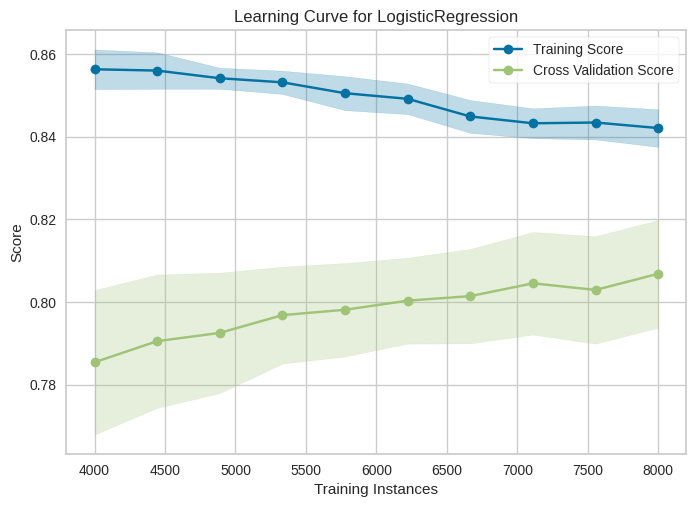

In [6]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [7]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Точность на тренировочных данных: {lr.score(X_train, y_train):.4f}")
print(f"Точность на тестовых данных: {lr.score(X_test, y_test):.4f}")

Точность на тренировочных данных: 0.7724
Точность на тестовых данных: 0.7712


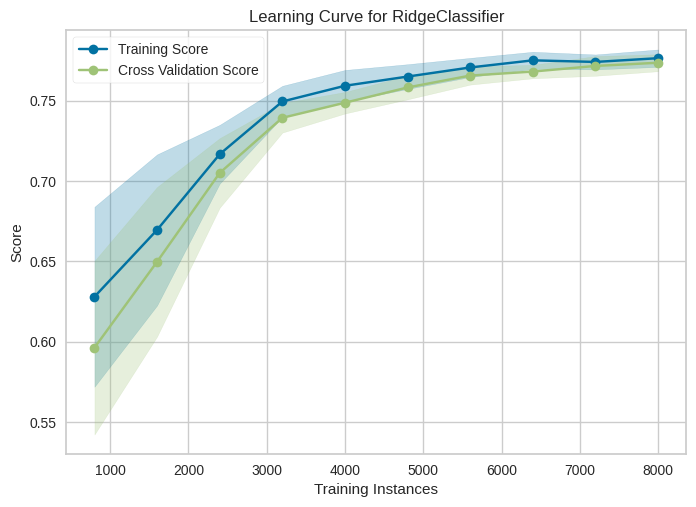

In [8]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

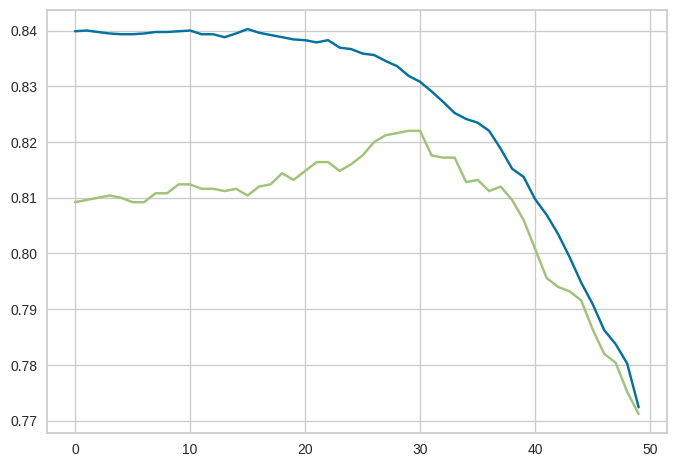

In [9]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)